In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ceruleo.dataset.catalog.WaterPumpDataset import WaterPumpDataset
import matplotlib.pyplot as plt 
import seaborn as sbn
sbn.set()

c:\Users\LucianoLorenti\venvs\ceruleo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Load the dataset

In [3]:
dataset = WaterPumpDataset(
    kaggle_username="lucianolorenti",
    kaggle_key= "8208f84a9a2e9231691327c56cdadc6d"
)

# 2. EDA

5 is a standalone sensor, 6-9 are grouped, 10-12 are, 13 is stand alone (vibration), 14-17 is grouped, 18 standalone (vibration), 19-33 grouped, 34-36 grouped, 37 standalone, 38-44 grouped, 45-49 grouped, 50-51 simialr to 45-49 but different but to similar not to be a pair.

## 2.1 Sample rate

,Mean sample rate,Std sample rate,Mode sample rate
Dataset,60.0,0.0,60.0


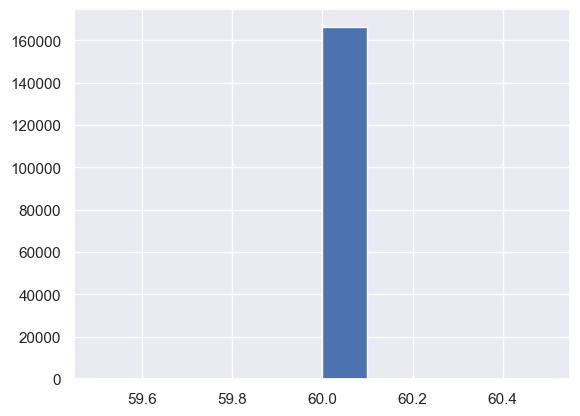

In [4]:
from ceruleo.dataset.analysis.sample_rate import sample_rate, sample_rate_summary
fig, ax = plt.subplots()
ax.hist(sample_rate(dataset, unit="s"))

sample_rate_summary(dataset, unit="s")

In [ ]:
## 2.2 Feature analysis

In [5]:
from ceruleo.dataset.analysis.numerical_features import analysis


analysis(dataset, what_to_compute=["null"])

,null Mean,null Max,null Min
Life,0.0+/-0,0.0,0.0
Motor Active Power,0.05+/-0.12,0.347261,0.0
Motor Apparent Power,0.06+/-0.12,0.356886,0.0
Motor Casing Vibration,0.10+/-0.16,0.464441,0.0
Motor Coupling Vibration,0.00009+/-0.00011,0.000306,0.0
Motor Current,0.00009+/-0.00011,0.000306,0.0
Motor Frequency A,0.0006+/-0.0008,0.001757,0.0
Motor Frequency B,0.00009+/-0.00011,0.000306,0.0
Motor Frequency C,0.00009+/-0.00011,0.000306,0.0
Motor Non Drive End Radial Bearing Temp 1,0.00011+/-0.00011,0.000306,0.0


## 2.1 Motor casing vibration


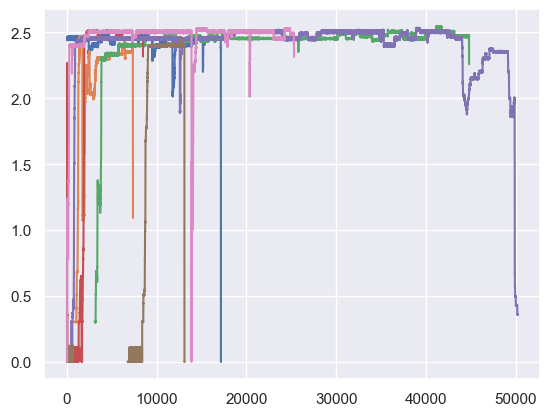

In [6]:

fig, ax = plt.subplots()
for life in dataset:
    life = life.reset_index()
    ax.plot(life.index, life["Motor Casing Vibration"])

## 2.3 Motor frequency [Hz] 



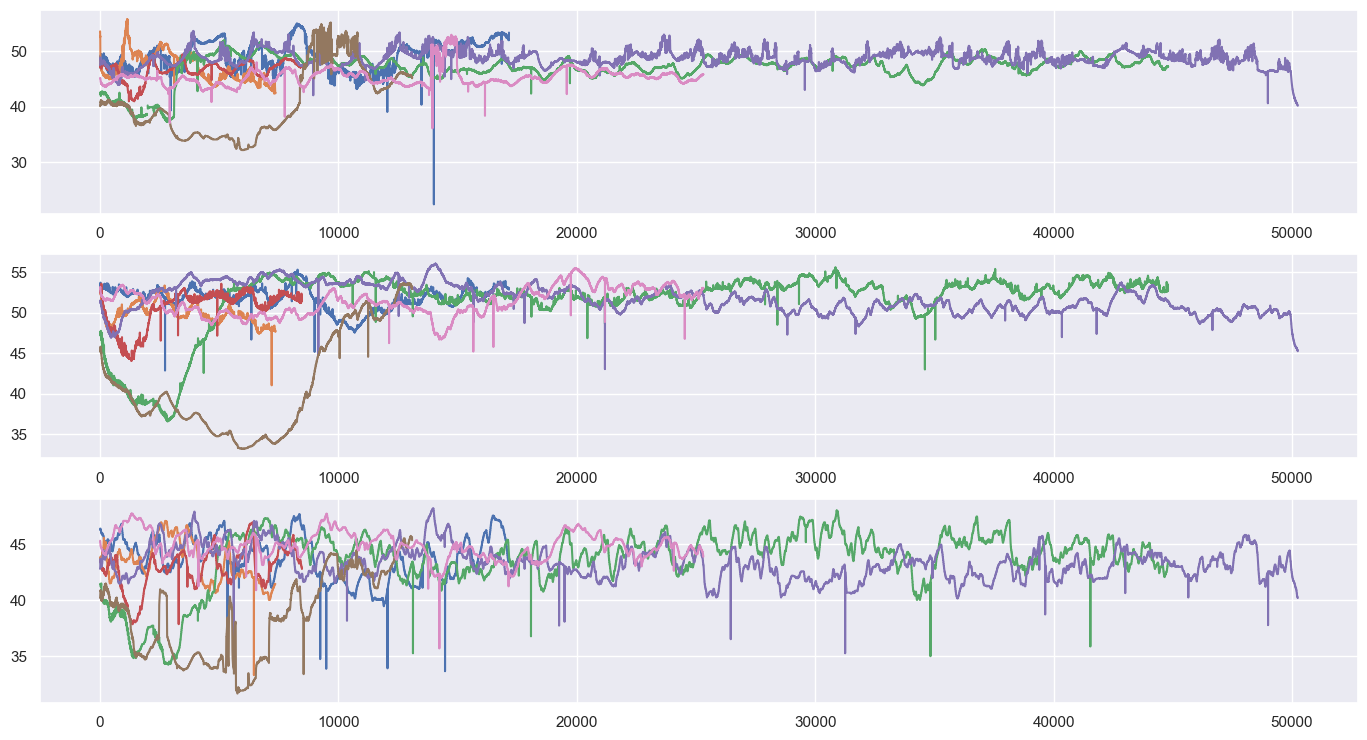

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(17,9))
for life in dataset:
    life = life.reset_index()
    ax[0].plot(life.index, life[ "Motor Frequency A"])
    ax[1].plot(life.index, life[ "Motor Frequency B"])
    ax[2].plot(life.index, life[ "Motor Frequency C"])
    
               
      

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(17,9))
for life in dataset:
    life = life.reset_index()
    ax[0].plot(life.index, life[ "Motor Frequency A"])
    ax[1].plot(life.index, life[ "Motor Frequency B"])
    ax[2].plot(life.index, life[ "Motor Frequency C"])
    
               


# 2. Model

In [4]:
from ceruleo.transformation.functional.transformers import Transformer
from ceruleo.transformation.features.selection import ByNameFeatureSelector
from ceruleo.transformation.functional.pipeline.pipeline import make_pipeline
from ceruleo.transformation.features.scalers import MinMaxScaler
from ceruleo.dataset.catalog.CMAPSS import sensor_indices
from ceruleo.iterators.utils import true_values
from ceruleo.dataset.catalog.WaterPumpDataset import FEATURES_COLUMNS
from ceruleo.models.baseline import BaselineModel
from ceruleo.iterators.utils import true_values
from ceruleo.iterators.shufflers import AllShuffled
from ceruleo.iterators.iterators import WindowedDatasetIterator
from ceruleo.models.keras.dataset import tf_regression_dataset
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
from sklearn.model_selection import train_test_split
from itertools import combinations


def split_list_proportionally(dataset, train_size:float):
    durations = dataset.number_of_samples()
    total_sum = sum(durations)
    first_list_sum = total_sum * train_size

    first_list = []
    current_sum = 0

    for i, life in enumerate(dataset):
        first_list.append(i)
        current_sum += life.shape[0]
        if current_sum >= first_list_sum:
            break

    second_dataset = dataset[len(first_list):]

    return dataset[first_list], second_dataset


def split_list_proportionally_best(dataset, train_size):
    numbers = dataset.number_of_samples()
    total_sum = sum(numbers)
    target_sum = total_sum * train_size

    best_sum = 0
    best_combination = None

    for r in range(1, len(numbers)):
        for combination in combinations(range(len(numbers)), r):
            combination_sum = sum(numbers[i] for i in combination)
            if abs(combination_sum - target_sum) < abs(best_sum - target_sum):
                best_sum = combination_sum
                best_combination = combination

    first_list_indices = list(best_combination)
    second_list_indices = [i for i in range(len(numbers)) if i not in first_list_indices]

    return dataset[first_list_indices], dataset[second_list_indices]


train_dataset, test_dataset = split_list_proportionally_best(dataset, train_size=0.8)
train_dataset, val_dataset = split_list_proportionally_best(train_dataset, train_size=0.8)

In [16]:
from ceruleo.transformation.features.imputers import MeanImputer


transformer = Transformer(
    pipelineX=make_pipeline(
        ByNameFeatureSelector(features=FEATURES_COLUMNS), 
        MeanImputer(),
        MinMaxScaler(range=(-1, 1))

    ), 
    pipelineY=make_pipeline(
        ByNameFeatureSelector(features=['RUL']),  
    )
)

transformer.fit(train_dataset)

transformed_train_dataset = train_dataset.map(transformer)
transformed_val_dataset = val_dataset.map(transformer)
transformed_test_dataset = test_dataset.map(transformer)

In [ ]:
# Baselinea model

In [17]:

model_mean = BaselineModel(mode='mean')
model_mean.fit(transformed_train_dataset)

model_median = BaselineModel(mode='median')
model_median.fit(transformed_train_dataset)

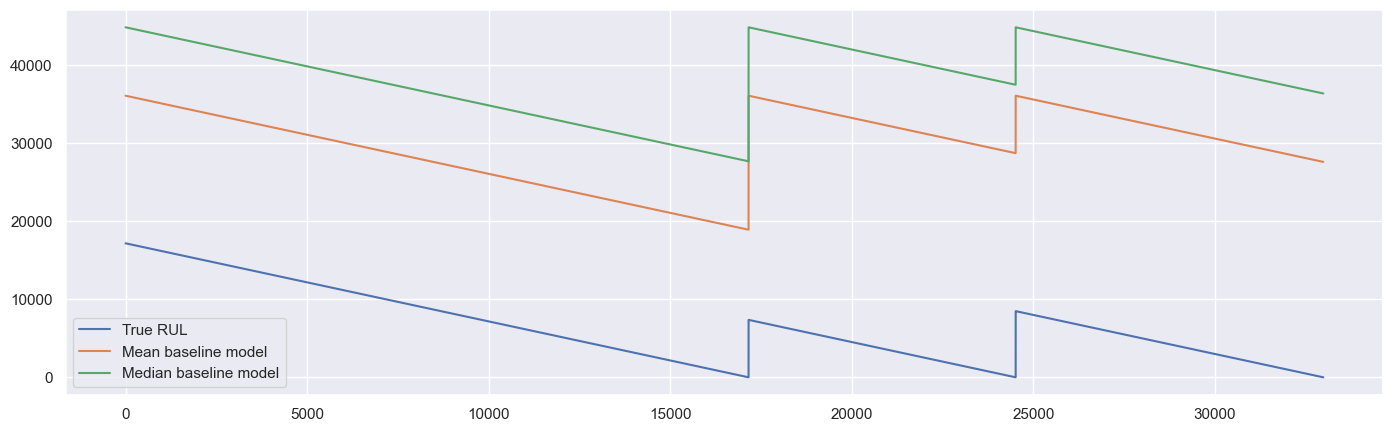

In [18]:
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(true_values(transformed_test_dataset), 
        label='True RUL')
ax.plot(model_mean.predict(transformed_test_dataset), 
        label='Mean baseline model')
ax.plot(model_median.predict(transformed_test_dataset), 
        label='Median baseline model')

ax.legend()

In [20]:
from ceruleo.iterators.sample_weight import ExponentialDecay


train_iterator = WindowedDatasetIterator(
    train_dataset.map(transformer),
    window_size=120,
    step=1,
    horizon=1,
    sample_weight=ExponentialDecay(60*5),
    shuffler=AllShuffled())


val_iterator = WindowedDatasetIterator(
    val_dataset.map(transformer),
    window_size=120,
    step=1,
    horizon=1)


test_iterator = WindowedDatasetIterator(
    test_dataset.map(transformer),
    window_size=120,
    step=1,
    horizon=1)

In [23]:

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (Conv1D, 
                                     SeparableConv1D, 
                                     GlobalMaxPooling1D,
                                     SpatialDropout1D,
                                     LayerNormalization,
                                     Dropout,
                                     Flatten, Dense, Lambda)

input = Input(train_iterator.shape)
x = Conv1D(64, 3, padding='same', activation='relu')(input)
x = Conv1D(64, 3, padding='same', activation='relu')(x)
x = Conv1D(64, 3, padding='same', activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='linear')(x)

model = Model(input, x)
model.compile(loss='mae', 
               
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              weighted_metrics=[])

In [26]:

model.fit(tf_regression_dataset(train_iterator).batch(32),
         validation_data=tf_regression_dataset(val_iterator).batch(32),
         epochs=25,
         callbacks=[EarlyStopping(patience=5)])

Epoch 1/25
3369/3369 [==============================] - 98s 29ms/step - loss: 1171.9962 - val_loss: 9850.5479
Epoch 2/25
3369/3369 [==============================] - 103s 31ms/step - loss: 1072.4592 - val_loss: 9816.7666
Epoch 3/25
3369/3369 [==============================] - 101s 30ms/step - loss: 992.2123 - val_loss: 10152.0596
Epoch 4/25
3369/3369 [==============================] - 102s 30ms/step - loss: 918.1303 - val_loss: 10394.1943
Epoch 5/25
3369/3369 [==============================] - 105s 31ms/step - loss: 852.6548 - val_loss: 10363.7246
Epoch 6/25
3369/3369 [==============================] - 101s 30ms/step - loss: 783.2689 - val_loss: 10433.0635
Epoch 7/25
1265/3369 [==========>...................] - ETA: 1:14:19 - loss: 689.9832

KeyboardInterrupt: 

1020/1020 [==============================] - 17s 16ms/step


<Axes: xlabel='Hours [h]', ylabel='Hours [h]'>

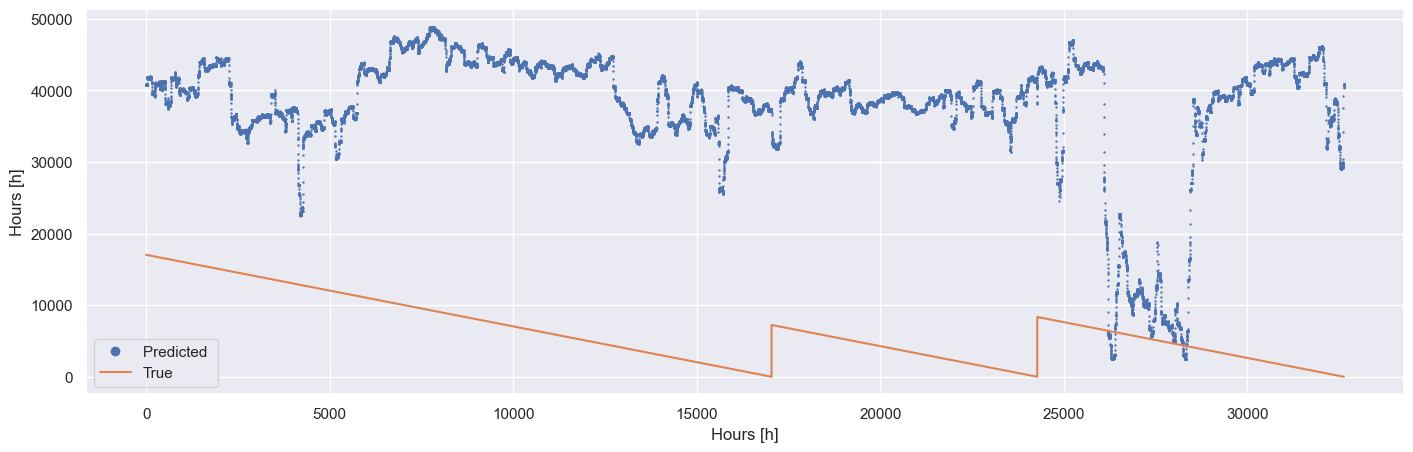

In [27]:
from ceruleo.graphics.results import plot_predictions

plot_predictions( 
    (
        true_values(test_iterator),
        model.predict(tf_regression_dataset(test_iterator).batch(32))
    ),
    figsize=(17, 5)
)